Norm > 1
Norm of angle at time step of 42 is 0.639390360842651


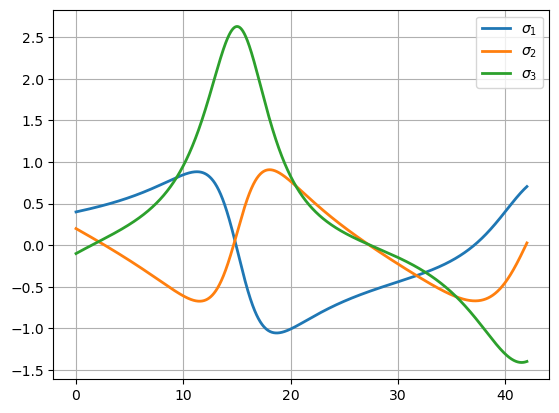

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def MRP(y, t):
    B_rate = 20 * np.pi / 180 * np.array([np.sin(0.1 * t), 0.01, np.cos(0.1 * t)])
    s = y
    s1, s2, s3 = s
    s_n = np.sqrt(s1**2 + s2**2 + s3**2)
    s_prime = np.array([[0, -s3, s2],
                        [s3, 0, -s1],
                        [-s2, s1, 0]])
    B = (np.eye(3) * (1 - s_n**2) + 2 * s_prime + 2 * np.outer(s, s))
    dy = 0.25 * np.dot(B, B_rate)
    return dy

s0 = np.array([0.4, 0.2, -0.1])
tEnd = 42
tspan = np.arange(0, tEnd + step, step)

sol = odeint(MRP, s0, tspan)

s_norm = np.sqrt(sol[-1, 0]**2 + sol[-1, 1]**2 + sol[-1, 2]**2)
s = sol[-1, :]
s_norm = np.sqrt(s[0]**2 + s[1]**2 + s[2]**2)
if s_norm > 1:
    s = -s / s_norm**2
    print('Norm > 1')

s_norm = np.sqrt(s[0]**2 + s[1]**2 + s[2]**2)
print(f"Norm of angle at time step of {tEnd} is {s_norm}")
plt.figure(1)
plt.plot(t, sol, linewidth=2)
plt.legend(['$\\sigma_{1}$', '$\\sigma_{2}$', '$\\sigma_{3}$'], loc='best')
plt.grid(True)
plt.show()